In [1]:
import numpy as np

def Z(J,h,T):
    Z = 1 + 2*(np.cosh(h/T)) + np.exp(J/T)
    return Z

def energia_Livre(J, h, T):
    F = (-1) * T * (np.log(Z(J, h, T)))
    return F

def energia_Media(J, h, T):
    numerador = ((-1) * ((J * np.exp(J/T)) + (2 * h * np.sinh(h/T)))) 
    denominador = Z(J, h, T)
    U = (numerador / denominador)
    return U

def entropia(J, h, T):
    numerador = (((-1) * ((J*np.exp(J/T)) + (2*h*np.sinh(h/T))))/T)
    denominador = Z(J, h, T)
    S = (np.log(Z(J, h, T)) + (numerador / denominador))
    return S 

def magnetizacao(J, h, T):
    numerador = (2 * np.sinh(h/T))
    denominador = Z(J, h, T)
    M = (numerador / denominador)
    return M

def susceptibilidade(J, h, T):
    term1 = ((2 * np.cosh(h/T)) / (T * Z(J, h, T)))
    term2 = ((4 * (np.sinh(h/T))**2) / (T * (Z(J, h, T))**2))
    X = term1 - term2
    return X


In [181]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def Temp_MxB(J, h, T, entropy):
    #Função que vai garantir que a entropia do sistema vai ser constante durante todo o processo    
    function = (entropy - entropia(J, h, T)) 
    return function

def calcula_T_Ciclo_MxB(J, hi, hf, Tc, Th, PASSOS):
    
    Tcold = Tc
    Thot = Th
    
    S_c = round(entropia(J, hi, Tcold), 10)
    S_h = round(entropia(J, hf, Thot), 10)
    
    h_values_i = np.linspace(hi, hf, PASSOS)
    h_values_f = np.linspace(hf, hi, PASSOS)
    
    temperatures = []
    S_values_i = np.zeros_like(h_values_i)
    S_values_f = np.zeros_like(h_values_f)
    T_values_i = np.zeros_like(h_values_i)
    T_values_f = np.zeros_like(h_values_f)
    
    for i, h in enumerate(h_values_i):
        
        Tc_add = fsolve(lambda Temperature_cold: Temp_MxB(J, h_values_i[i], Temperature_cold, S_c), Tcold)
        
        T_values_i[i] = Tc_add[0]
        S_values_i[i] = np.round(entropia(J, h_values_i[i], T_values_i[i]), 10)
        S_c = S_values_i[i]
        temperatures.append(Tc_add[0])
        Tcold = Tc_add[0]
        
    for i, h in enumerate(h_values_f):
        
        Th_add = fsolve(lambda Temperature_hot: Temp_MxB(J, h_values_f[i], Temperature_hot, S_h), Thot)
        
        T_values_f[i] = Th_add[0]
        S_values_f[i] = np.round(entropia(J, h_values_f[i], T_values_f[i]), 10)
        S_h = S_values_f[i]
        temperatures.append(Th_add[0])
        Thot = Th_add[0]
    
    T_heating_values = np.linspace(Tc_add, Th, PASSOS)
    T_cooling_values = np.linspace(Th_add, Tc, PASSOS)
    
    S_heating_values = np.zeros_like(h_values_i)
    S_cooling_values = np.zeros_like(h_values_i)
    
    S_heating_values = np.round(entropia(J, hf, T_heating_values), 10)
    S_cooling_values = np.round(entropia(J, hi, T_cooling_values), 10)
    
    
    print("Temperatures Range:")
    print(f"1 -> 2 (Tc -> Tc_add): Tc: {Tc}, Tc_add: {Tc_add}")
    print(f"2 -> 3 (T_heating): Tc_add: {Tc_add} Th: {Th}")
    print(f"3 -> 4 (Th -> Th_add): Th: {Th}, Th_add: {Th_add}")
    print(f"4 -> 1 (T_cooling): Th_add: {Th_add}, Tc: {Tc}")

    
    
    return Tc_add, Th_add, T_values_i, T_values_f, h_values_i, h_values_f, S_values_i, S_values_f, T_heating_values, T_cooling_values, S_heating_values, S_cooling_values

In [4]:
def Ciclo_de_Otto_MxB(J, hi, hf, Tc, Tc_add, Th, Th_add):
    
    #calculando a energia interna para J1, hi e Tc
    E1 = energia_Media(J, hi, Tc)
    
    #calculando a energia interna para Jf, hf e Tc_add
    E2 = energia_Media(J, hf, Tc_add)
    
    #calculando a energia interna para Jf, hf e Th
    E3 = energia_Media(J, hf, Th)
    
    #calculando a energia interna para Ji, hi e Th_add
    E4 = energia_Media(J, hi, Th_add)
    
    #calculando Os valores de Trabalho e Calor em cada parte do Ciclo de Otto
    Wout = E2 - E1
    Qin = E3 - E2
    Win = E4 - E3
    Qout = E1 - E4
    
    #Calculando a eficiência do ciclo 
    print(f'eff = -(Wout + Win)/abs(Qin)')
    eff = -(Wout + Win)/abs(Qin)
    
    
    return [Win, Wout, Qin, Qout, eff] 

In [14]:
def functions_MxB(J, hi, h_values_i, hf, h_values_f, Tc, T_values_i, Th, T_values_f, T_heating_values, T_cooling_values):
    
    #Calcula as temperaturas do Ciclo de Otto
    #T_values_i, T_values_f, h_values_i, h_values_f, S_values_i, S_values_f, T_heating_values, T_cooling_values = calcula_T_Ciclo_MxB(J, hi, hf, Tc, Th, PASSOS)
    
    
    
    #Expansão Adiabática
    M_exp_add = magnetizacao(J, h_values_i, T_values_i)
    
    #Aquecimento Isocórico
    M_aquec_iso = magnetizacao(J, hf, T_heating_values)
    
    #Compressão Adiabática
    M_comp_add = magnetizacao(J, h_values_f, T_values_f)
    
    #Resfriamento Isocórico
    M_resfri_iso = magnetizacao(J, hi, T_cooling_values)    
    
    
    
    
    return M_exp_add, M_aquec_iso, M_comp_add, M_resfri_iso

In [137]:
def engineOrWhat(Win, Wout, Qhot, Qcold, Tc, Th, eff):

#Importante lembrar que para o caso "normal"
#Win, Wout, Qin = Qhot, Qout = Qcold, Tc, Th, eff

    titulo = 'inconclusivo'
    #Definindo o Trabalho do Ciclo
    W = Win + Wout   
    
    Tcold = Tc
    Thot  = Th
    
    print(f'W = {W}')
    #Definindo as regiões
    #0: Máquina, [1,2): Refrigerador, [2, 3): Acelerador, [3,4): Aquecedor
    if W < 0:
        titulo = 'Máquina'
        print("Máquina!")
    elif (W > 0 and Qcold < 0 and Qhot > 0 and Tc > Th):
        print("Acelerador")
        titulo = 'Acelerador'
    elif (W > 0 and Qcold > 0 and Qhot < 0 and Tc < Th):
        titulo = 'Acelerador'
        print("Acelerador!")
    elif (W > 0 and Qcold < 0 and Qhot > 0 and Tc < Th):
        titulo = 'Refrigerador'
        print("Refrigerador!")
    elif (W > 0 and Qcold > 0 and Qhot < 0 and Tc > Th):
        titulo = 'Refrigerador'
        print("Refrigerador!")
    elif (W > 0 and Qhot < 0 and Qcold < 0):
        titulo = 'Aquecedor'
        print("Aquecedor!")


    eta = abs(W)/abs(Qhot)

    print(f'W = Win + Wout')
    print(f"ETA = abs(W) / abs(Qin) ETA=Eff???: {eta}")
    print(f"Win: {Win}, Wout: {Wout}, Qin: {Qhot}, Qout: {Qcold}, eff: {eff}")
    
    return titulo

In [206]:
def plot_ciclo_MxB(hi, hf, h_values_i, h_values_f, M_exp_add, M_aquec_iso, M_comp_add, M_resfri_iso, titulo):
    
    
    
    h_heating = np.linspace(hf, hf, len(M_aquec_iso))
    h_cooling = np.linspace(hi, hi, len(M_resfri_iso))
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(h_values_i, M_exp_add, label='Expansão Adiabática', color='blue', marker='>')
    plt.plot(h_heating, M_aquec_iso, label='Aquecimento Isocórico', color='orange', marker='o')
    plt.plot(h_values_f, M_comp_add, label='Compressão Adiabática', color='green', marker='<')
    plt.plot(h_cooling, M_resfri_iso, label='Resfriamento Isocórico', color='red', marker='x')    
    
    
    plt.xlabel('Campo Magnético (h)')
    plt.ylabel('Magnetização (M)')
    plt.title(f'Ciclo de Otto Mxh -- {titulo}!')
    plt.legend()
    plt.grid()
    plt.show()
    
def plot_ciclo_SxB(J, hi, hf, h_values_i, h_values_f, S_values_i , S_values_f, S_heating_values, S_cooling_values, titulo):
    
    h_heating = np.linspace(hf, hf, len(h_values_i))
    h_cooling = np.linspace(hi, hi, len(h_values_i))
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(h_values_i, S_values_i, label='Expansão Adiabática', color='blue', marker='>')
    plt.plot(h_heating, S_heating_values, label='Aquecimento Isocórico', color='orange', marker='x')
    plt.plot(h_values_f, S_values_f, label='Compressão Adiabática', color='green', marker='<')
    plt.plot(h_cooling, S_cooling_values, label='Resfriamento Isocórico', color='red', marker='o')
    
    plt.xlabel('Campo Magnético (h)')
    plt.ylabel('Entropia (S)')
    plt.title(f'Ciclo de Otto Sxh -- {titulo} | J={J}')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
    
    #calcula_T_Ciclo_MxB(J, hi, hf, Tc, Th, PASSOS):
    #return Tc_add, Th_add, T_values_i, T_values_f, h_values_i, h_values_f, S_values_i, S_values_f, T_heating_values, T_cooling_values, S_heating_values, S_cooling_values
    
    #functions_MxB(J, hi, hf, Tc, Th, PASSOS):
    #return M_exp_add, M_aquec_iso, M_comp_add, M_resfri_iso
    
    #def Ciclo_de_Otto_MxB(J, hi, hf, Tc, Tc_add, Th, Th_add):
    #return [Win, Wout, Qin, Qout, eff] 
    
    #engineOrWhat(Win, Wout, Qhot, Qcold, Tc, Th, eff):
    
    #plot_ciclo_MxB(T_values_i, T_values_f, h_values_i, h_values_f, S_values_i, S_values_f, T_heating_values, T_cooling_values):
    
    #plot_ciclo_MxB(hi, hf, h_values_i, h_values_f, M_exp_add, M_aquec_iso, M_comp_add, M_resfri_iso):

In [203]:
def main_MxB(J, hi, hf, Tc, Th, PASSOS):
    
    Tc_add, Th_add, T_values_i, T_values_f, h_values_i, h_values_f, S_values_i, S_values_f, T_heating_values, T_cooling_values, S_heating_values, S_cooling_values= calcula_T_Ciclo_MxB(J, hi, hf, Tc, Th, PASSOS)
    
    M_exp_add, M_aquec_iso, M_comp_add, M_resfri_iso = functions_MxB(J, hi, h_values_i, hf, h_values_f, Tc, T_values_i, Th, T_values_f, T_heating_values, T_cooling_values)
    
    Win, Wout, Qin, Qout, eff = Ciclo_de_Otto_MxB(J, hi, hf, Tc, Tc_add, Th, Th_add)
    titulo = engineOrWhat(Win, Wout, Qin, Qout, Tc, Th, eff)
    
    #plot_ciclo_MxB(hi, hf, h_values_i, h_values_f, M_exp_add, M_aquec_iso, M_comp_add, M_resfri_iso, titulo)
    
    plot_ciclo_SxB(J, hi, hf, h_values_i, h_values_f, S_values_i , S_values_f, S_heating_values, S_cooling_values, titulo)

Temperatures Range:
1 -> 2 (Tc -> Tc_add): Tc: 2.5, Tc_add: [5.]
2 -> 3 (T_heating): Tc_add: [5.] Th: 7.5
3 -> 4 (Th -> Th_add): Th: 7.5, Th_add: [3.75]
4 -> 1 (T_cooling): Th_add: [3.75], Tc: 2.5
eff = -(Wout + Win)/abs(Qin)
W = [-0.06482653]
Máquina!
W = Win + Wout
ETA = abs(W) / abs(Qin) ETA=Eff???: [0.5]
Win: [0.13254879], Wout: [-0.19737532], Qin: [0.12965306], Qout: [-0.06482653], eff: [0.5]


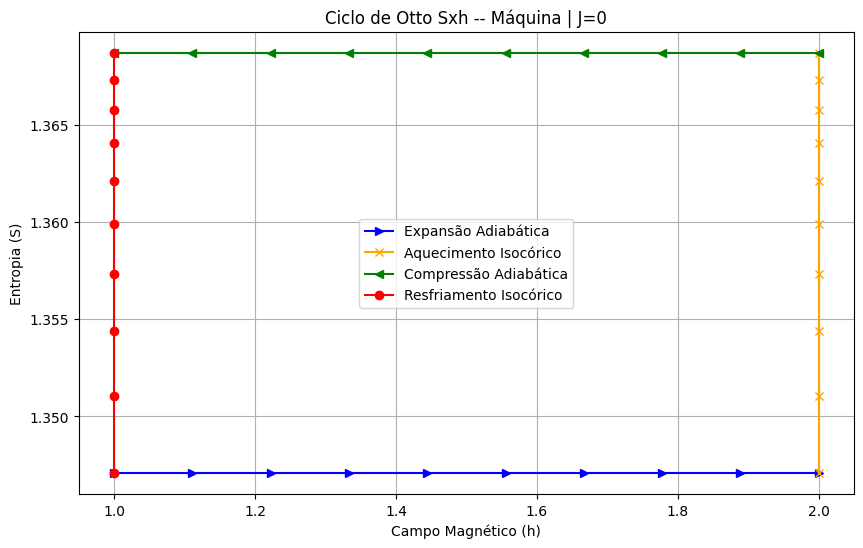

In [207]:
J = 0; hi = 1; hf = 2; Tc= 2.5; Th=7.5; PASSOS = 10
main_MxB(J, hi, hf, Tc, Th, PASSOS)

Temperatures Range:
1 -> 2 (Tc -> Tc_add): Tc: 2.5, Tc_add: [2.44596046]
2 -> 3 (T_heating): Tc_add: [2.44596046] Th: 1.5
3 -> 4 (Th -> Th_add): Th: 1.5, Th_add: [1.63173715]
4 -> 1 (T_cooling): Th_add: [1.63173715], Tc: 2.5
eff = -(Wout + Win)/abs(Qin)
W = [-0.03878822]
Máquina!
W = Win + Wout
ETA = abs(W) / abs(Qin) ETA=Eff???: [0.05160911]
Win: [0.07942734], Wout: [-0.11821556], Qin: [-0.75157693], Qout: [0.79036514], eff: [0.05160911]


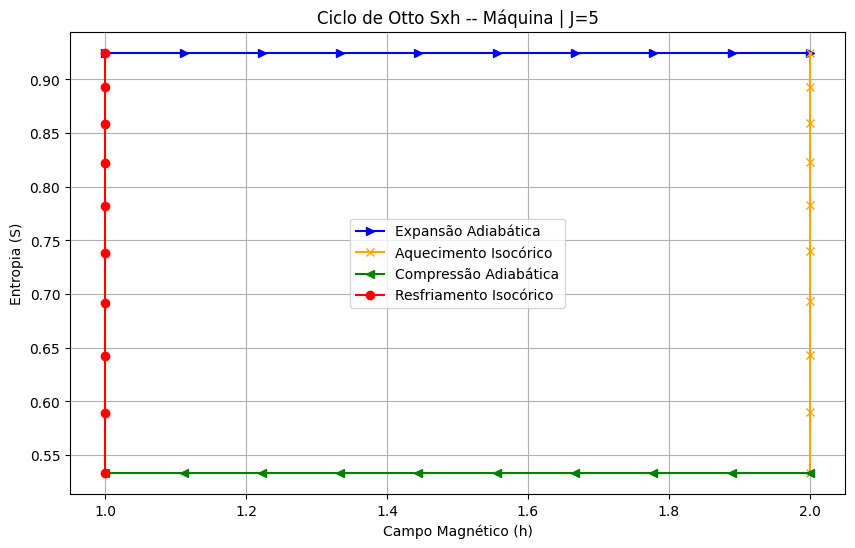

In [208]:
J = 5; hi = 1; hf = 2; Tc= 2.5; Th=1.5; PASSOS = 10
main_MxB(J, hi, hf, Tc, Th, PASSOS)

Temperatures Range:
1 -> 2 (Tc -> Tc_add): Tc: 2.5, Tc_add: [5.]
2 -> 3 (T_heating): Tc_add: [5.] Th: 4
3 -> 4 (Th -> Th_add): Th: 4, Th_add: [2.]
4 -> 1 (T_cooling): Th_add: [2.], Tc: 2.5
eff = -(Wout + Win)/abs(Qin)
W = [0.04754334]
Acelerador!
W = Win + Wout
ETA = abs(W) / abs(Qin) ETA=Eff???: [0.5]
Win: [0.24491866], Wout: [-0.19737532], Qin: [-0.09508668], Qout: [0.04754334], eff: [-0.5]


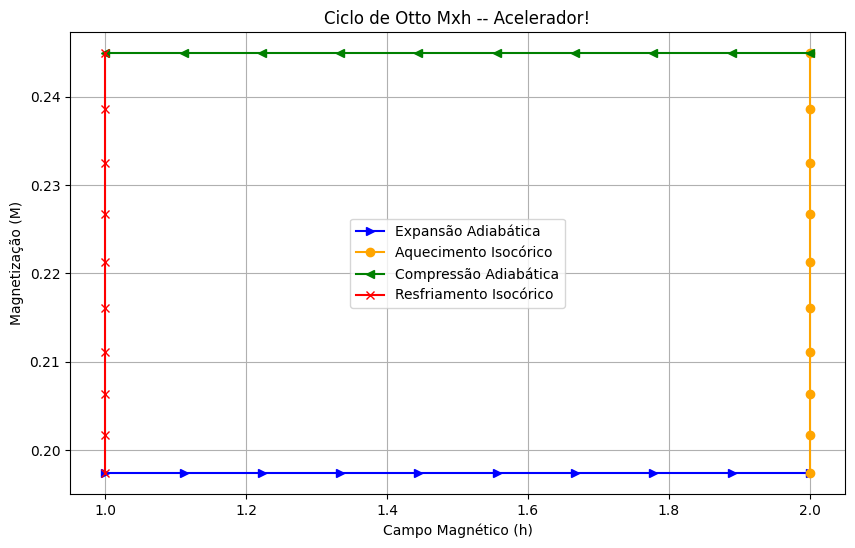

In [151]:
J = 0; hi = 1; hf = 2; Tc= 2.5; Th=4; PASSOS = 10
main_MxB(J, hi, hf, Tc, Th, PASSOS)

Temperatures Range:
1 -> 2 (Tc -> Tc_add): Tc: 2.5, Tc_add: [5.]
2 -> 3 (T_heating): Tc_add: [5.] Th: 1.5
3 -> 4 (Th -> Th_add): Th: 1.5, Th_add: [0.75]
4 -> 1 (T_cooling): Th_add: [0.75], Tc: 2.5
eff = -(Wout + Win)/abs(Qin)
W = [0.38540763]
Refrigerador!
W = Win + Wout
ETA = abs(W) / abs(Qin) ETA=Eff???: [0.5]
Win: [0.58278295], Wout: [-0.19737532], Qin: [-0.77081525], Qout: [0.38540763], eff: [-0.5]


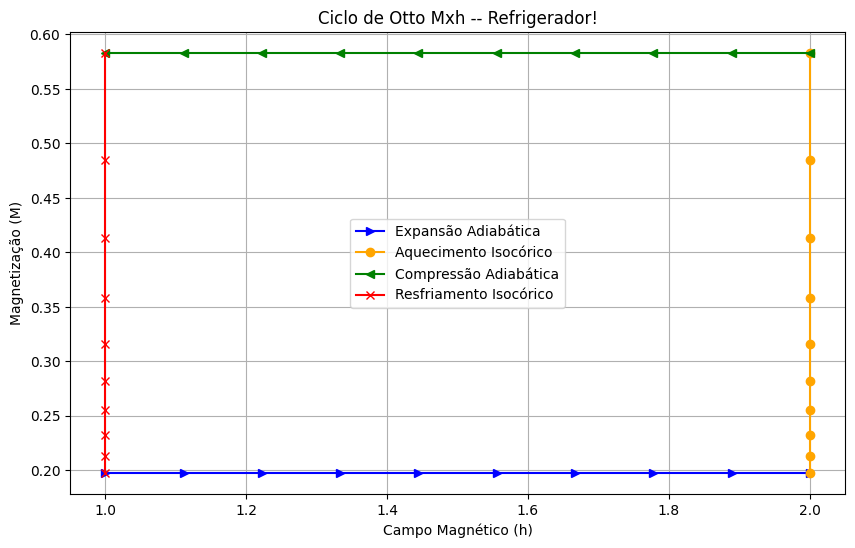

In [178]:
J = 0; hi = 1; hf = 2; Tc= 2.5; Th=1.5; PASSOS = 10
main_MxB(J, hi, hf, Tc, Th, PASSOS)

Temperatures Range:
1 -> 2 (Tc -> Tc_add): Tc: 2.5, Tc_add: [3.39581834]
2 -> 3 (T_heating): Tc_add: [3.39581834] Th: 7.5
3 -> 4 (Th -> Th_add): Th: 7.5, Th_add: [5.25154056]
4 -> 1 (T_cooling): Th_add: [5.25154056], Tc: 2.5
eff = -(Wout + Win)/abs(Qin)
W = [-0.09593825]
Máquina!
W = Win + Wout
ETA = abs(W) / abs(Qin) ETA=Eff???: [0.28303587]
Win: [0.1075319], Wout: [-0.20347015], Qin: [0.33896145], Qout: [-0.2430232], eff: [0.28303587]


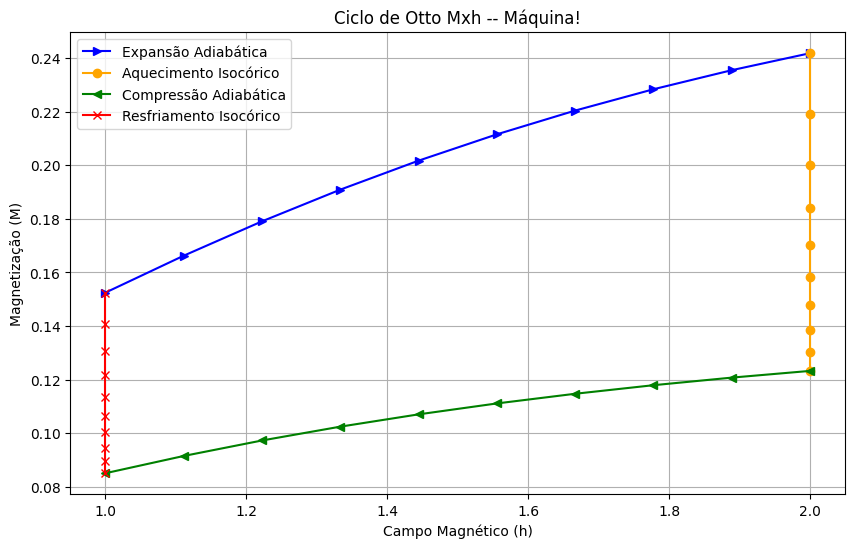

In [179]:
J = 2; hi = 1; hf = 2; Tc= 2.5; Th=7.5; PASSOS = 10
main_MxB(J, hi, hf, Tc, Th, PASSOS)

Temperatures Range:
1 -> 2 (Tc -> Tc_add): Tc: 2.5, Tc_add: [2.41928554]
2 -> 3 (T_heating): Tc_add: [2.41928554] Th: 1
3 -> 4 (Th -> Th_add): Th: 1, Th_add: [1.64620867]
4 -> 1 (T_cooling): Th_add: [1.64620867], Tc: 2.5
eff = -(Wout + Win)/abs(Qin)
W = [-0.12437325]
Máquina!
W = Win + Wout
ETA = abs(W) / abs(Qin) ETA=Eff???: [0.22960409]
Win: [0.38069017], Wout: [-0.50506342], Qin: [-0.54168567], Qout: [0.66605892], eff: [0.22960409]


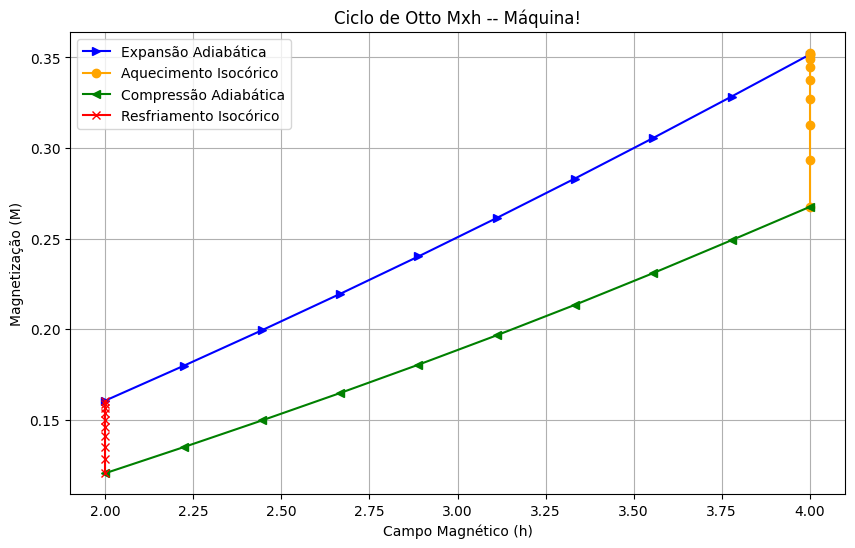

In [180]:
J = 5; hi = 2; hf = 4; Tc= 2.5; Th=1; PASSOS = 10
main_MxB(J, hi, hf, Tc, Th, PASSOS)